### Importing dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('df.csv')

In [3]:
df

,0,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),Class,theft
0,0,22.035977,3.586221,0.0,0.0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,FullServiceRestaurant,Normal
1,1,14.649757,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
2,2,14.669567,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
3,3,14.677808,0.000000,0.0,0.0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,FullServiceRestaurant,Normal
4,4,14.824794,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
560650,560650,17.388701,1.972876,0.0,0.0,5.481225,1.0116,36.755737,36.755737,0.00000,0.000000,Warehouse,Theft6
560651,560651,17.274210,1.858385,0.0,0.0,5.481225,1.0116,34.861068,34.861068,0.00000,0.000000,Warehouse,Theft6
560652,560652,18.231203,2.815379,0.0,0.0,5.481225,1.0116,52.866559,52.866559,0.00000,0.000000,Warehouse,Theft6
560653,560653,17.737117,2.321293,0.0,0.0,5.481225,1.0116,43.758956,43.758956,0.00000,0.000000,Warehouse,Theft6


In [4]:
df['Class'].value_counts()

FullServiceRestaurant     35040
SecondarySchool           35040
Warehouse                 35040
SuperMarket               35040
StripMall                 35040
Stand-aloneRetail         35040
SmallOffice               35040
SmallHotel                35040
QuickServiceRestaurant    35040
Hospital                  35040
PrimarySchool             35040
OutPatient                35040
MidriseApartment          35040
MediumOffice              35040
LargeOffice               35040
LargeHotel                35040
0                            15
Name: Class, dtype: int64

#### * Six different types of frauds are present in this dataset.
#### 1) The first type of theft consists of a considerable reduction of electricity consumption during the day. This reduction is calculated by multiplying the consumption by the randomly chosen value between 0.1 and 0.8. 
#### 2) In the second type of theft, electricity consumption drops to zero at random and during an arbitrary period.
#### 3) The third type of theft is similar to the first type, but each consumption value (each hour) is multiplied by a random number.
#### 4) A random fraction of the mean consumption is generated for the fourth type of theft.
#### 5) The fifth type reports the mean consumption, and 
#### 6) The last type of theft (i.e., the sixth type) reverses the order of readings. 

### Number of output category

In [5]:
df['theft'].value_counts()

Normal    331824
Theft1     51083
Theft3     44349
Theft4     41460
Theft6     35413
Theft5     33553
Theft2     22973
Name: theft, dtype: int64

### Convering categorical value into numerical

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['theft'] = le.fit_transform(df['theft']) 

In [7]:
df['theft'].value_counts()

0    331824
1     51083
3     44349
4     41460
6     35413
5     33553
2     22973
Name: theft, dtype: int64

### checking for null values

In [8]:
df.isnull().sum()

0                                             0
Electricity:Facility [kW](Hourly)             0
Fans:Electricity [kW](Hourly)                 0
Cooling:Electricity [kW](Hourly)              0
Heating:Electricity [kW](Hourly)              0
InteriorLights:Electricity [kW](Hourly)       0
InteriorEquipment:Electricity [kW](Hourly)    0
Gas:Facility [kW](Hourly)                     0
Heating:Gas [kW](Hourly)                      0
InteriorEquipment:Gas [kW](Hourly)            0
Water Heater:WaterSystems:Gas [kW](Hourly)    0
Class                                         0
theft                                         0
dtype: int64

In [9]:
df.dtypes

0                                               int64
Electricity:Facility [kW](Hourly)             float64
Fans:Electricity [kW](Hourly)                 float64
Cooling:Electricity [kW](Hourly)              float64
Heating:Electricity [kW](Hourly)              float64
InteriorLights:Electricity [kW](Hourly)       float64
InteriorEquipment:Electricity [kW](Hourly)    float64
Gas:Facility [kW](Hourly)                     float64
Heating:Gas [kW](Hourly)                      float64
InteriorEquipment:Gas [kW](Hourly)            float64
Water Heater:WaterSystems:Gas [kW](Hourly)    float64
Class                                          object
theft                                           int32
dtype: object

In [10]:
df.shape

(560655, 13)

In [11]:
df.size

7288515

### Visualizations of normal consumers

In [12]:
normal = pd.DataFrame(df[df['theft'] == 0])

In [13]:
normal = normal.drop(["0","Class","theft"],axis=1)

In [14]:
len(normal.columns)

10

In [15]:
normal

,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly)
0,22.035977,3.586221,0.0,0.0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947
1,14.649757,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000
2,14.669567,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000
3,14.677808,0.000000,0.0,0.0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052
4,14.824794,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000
...,...,...,...,...,...,...,...,...,...,...
560626,17.388701,1.972876,0.0,0.0,5.481225,1.0116,36.755737,36.755737,0.00000,0.000000
560627,17.274210,1.858385,0.0,0.0,5.481225,1.0116,34.861068,34.861068,0.00000,0.000000
560628,18.231203,2.815379,0.0,0.0,5.481225,1.0116,52.866559,52.866559,0.00000,0.000000
560629,17.737117,2.321293,0.0,0.0,5.481225,1.0116,43.758956,43.758956,0.00000,0.000000


In [16]:
from matplotlib import pyplot as plt

In [17]:
arr_normal=normal.to_numpy()

In [18]:
arr_normal[:5]


array([[2.20359773e+01, 3.58622083e+00, 0.00000000e+00, 0.00000000e+00,
        4.58992533e+00, 8.18920000e+00, 1.36585903e+02, 1.23999076e+02,
        3.33988000e+00, 9.24694678e+00],
       [1.46497575e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.52997511e+00, 7.49020000e+00, 3.35988000e+00, 0.00000000e+00,
        3.33988000e+00, 2.00000000e-02],
       [1.46695667e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.52997511e+00, 7.49020000e+00, 3.35988000e+00, 0.00000000e+00,
        3.33988000e+00, 2.00000000e-02],
       [1.46778080e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.52997511e+00, 7.49020000e+00, 3.93193151e+00, 0.00000000e+00,
        3.33988000e+00, 5.92051506e-01],
       [1.48247939e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.52997511e+00, 7.49020000e+00, 3.35988000e+00, 0.00000000e+00,
        3.33988000e+00, 2.00000000e-02]])

In [19]:
columns=normal.columns
columns
column1=["Electricity:Facility","Fans","Cooling","Heating","InteriorLights","InteriorEquipment:Electricity","Gas:Facility","Heating","InteriorEquipment:Gas","Water Heater"]
len(column1)

10

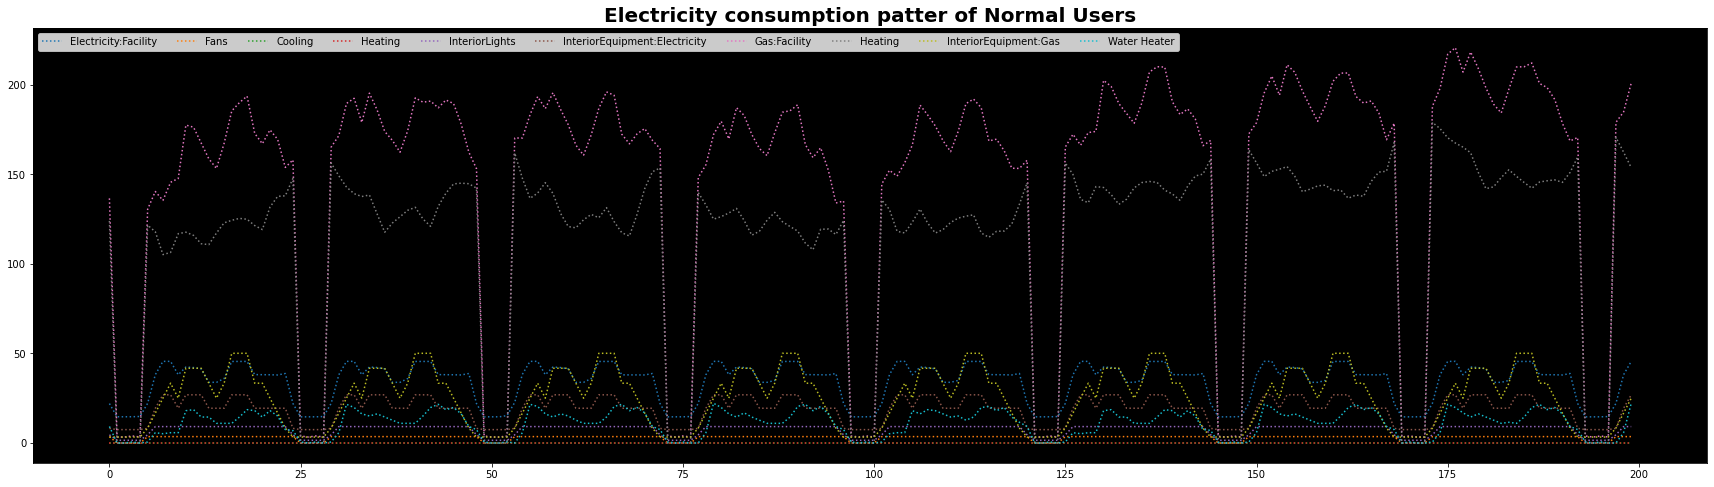

In [20]:

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(8)
ax = plt.axes()
 

ax.set_facecolor("black")
plt.title("Electricity consumption patter of Normal Users", fontweight='bold',fontsize=20)
plt.plot(arr_normal[:200],linestyle = 'dotted')
plt.legend(column1, ncol = 10)
plt.show()




# visualization of theft

In [21]:

theft=df[df['theft']!=0]

In [22]:
theft = theft.drop(["0","Class","theft"],axis=1)

In [23]:
theft_arr=theft.to_numpy()

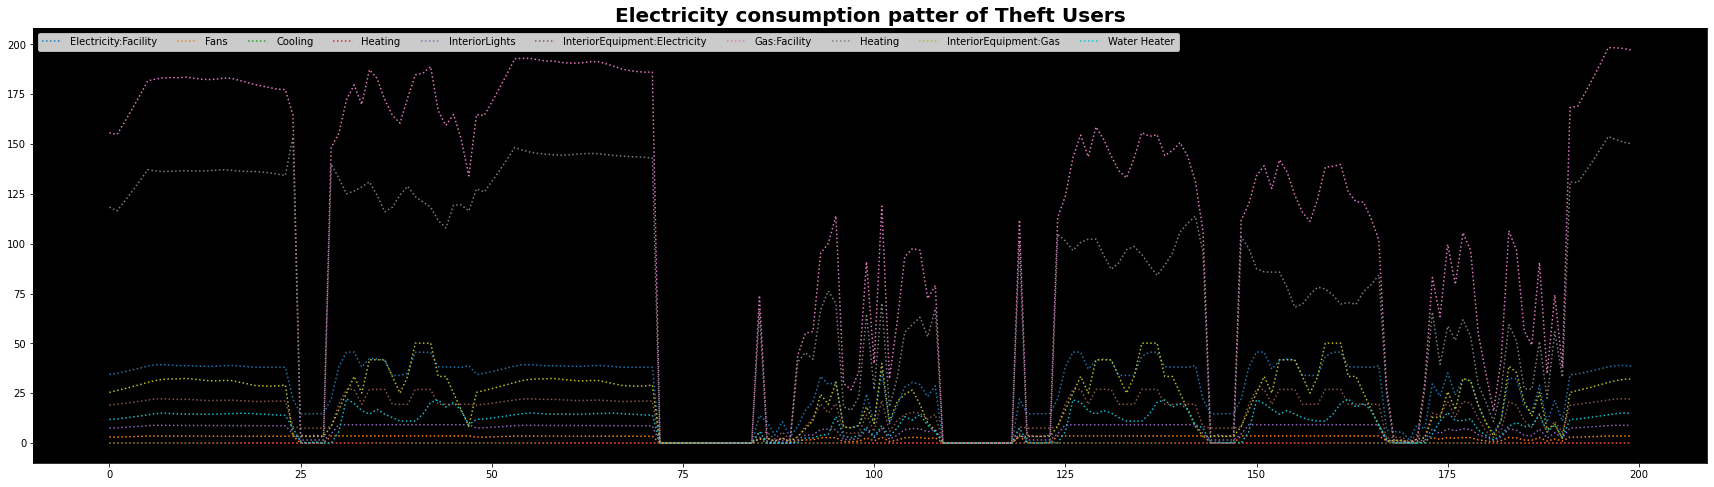

In [24]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(8)
ax = plt.axes()
 

ax.set_facecolor("black")
plt.title("Electricity consumption patter of Theft Users", fontweight='bold',fontsize=20)
plt.plot(theft_arr[:200],linestyle = 'dotted')
plt.legend(column1, ncol = 10)
plt.show()


### Theft1

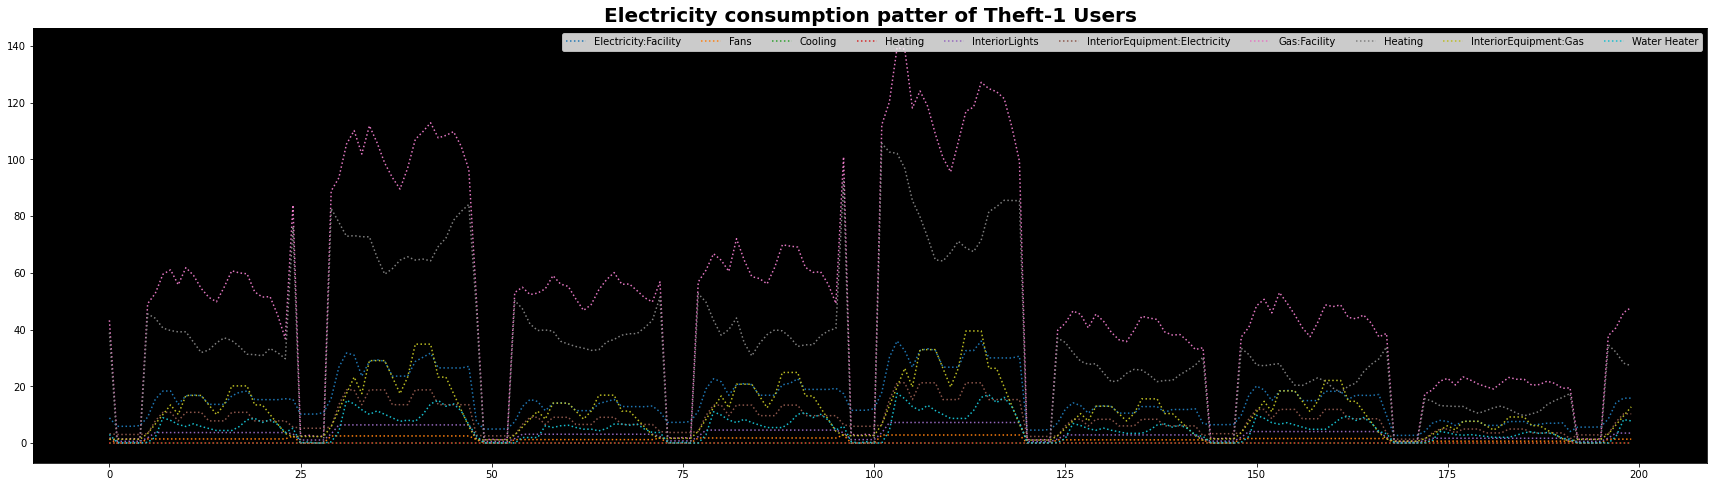

In [25]:
theft1=df[df['theft']==1]
theft1 = theft1.drop(["0","Class","theft"],axis=1)
theft1_arr=theft1.to_numpy()
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(8)
ax = plt.axes()
 

ax.set_facecolor("black")
plt.title("Electricity consumption patter of Theft-1 Users", fontweight='bold',fontsize=20)
plt.plot(theft1_arr[:200],linestyle = 'dotted')
plt.legend(column1, ncol = 10)
plt.show()


### Theft2

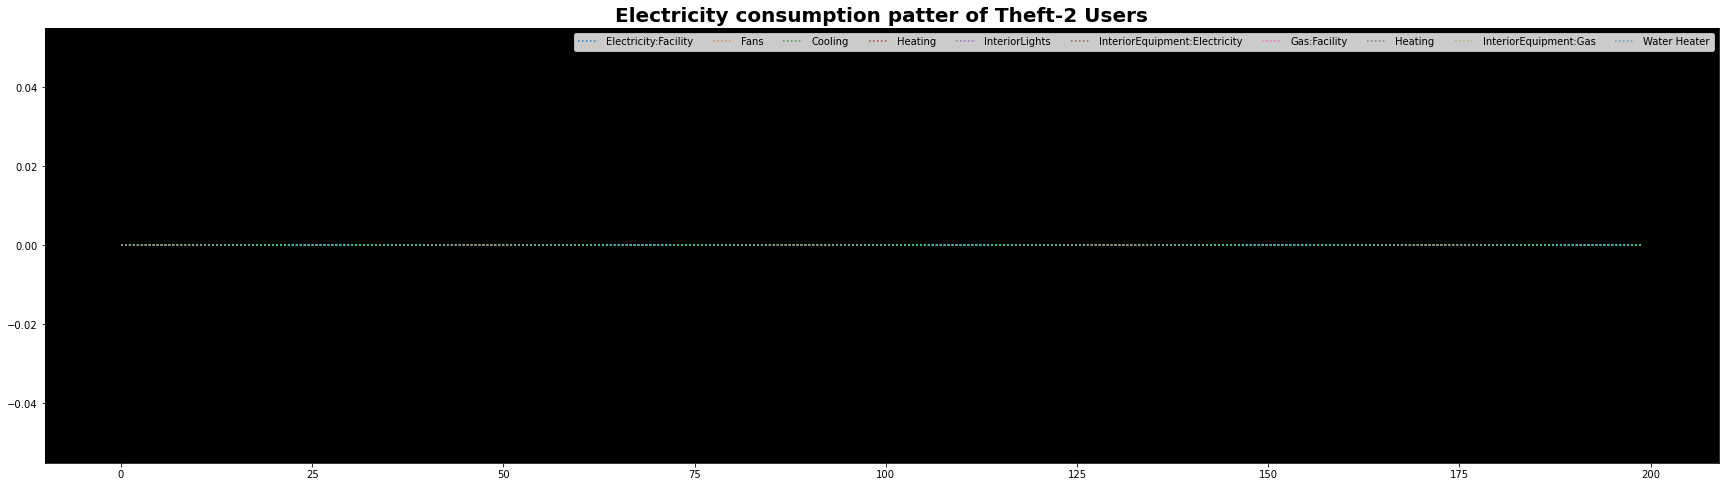

In [26]:
theft2=df[df['theft']==2]
theft2 = theft2.drop(["0","Class","theft"],axis=1)
theft2_arr=theft2.to_numpy()
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(8)
ax = plt.axes()
 

ax.set_facecolor("black")
plt.title("Electricity consumption patter of Theft-2 Users", fontweight='bold',fontsize=20)
plt.plot(theft2_arr[:200],linestyle = 'dotted')
plt.legend(column1, ncol = 10)
plt.show()


### Theft3

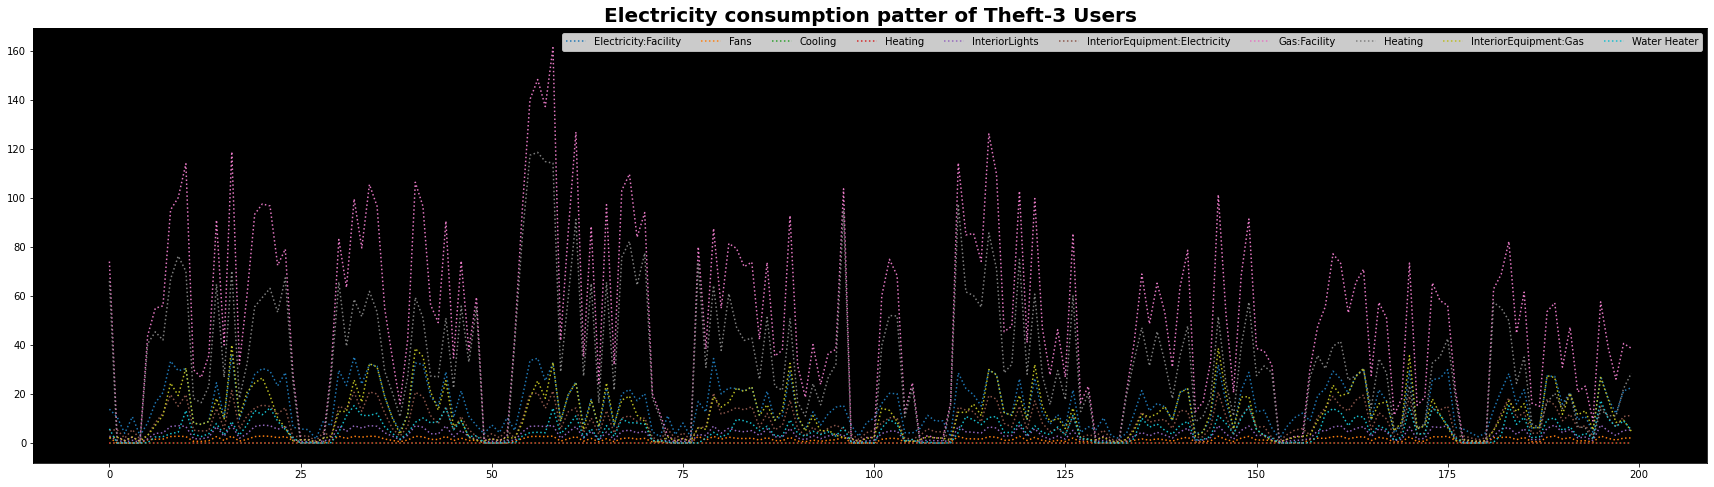

In [27]:
theft3=df[df['theft']==3]
theft3 = theft3.drop(["0","Class","theft"],axis=1)
theft3_arr=theft3.to_numpy()
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(8)
ax = plt.axes()
 

ax.set_facecolor("black")
plt.title("Electricity consumption patter of Theft-3 Users", fontweight='bold',fontsize=20)
plt.plot(theft3_arr[:200],linestyle = 'dotted')
plt.legend(column1, ncol = 10)
plt.show()


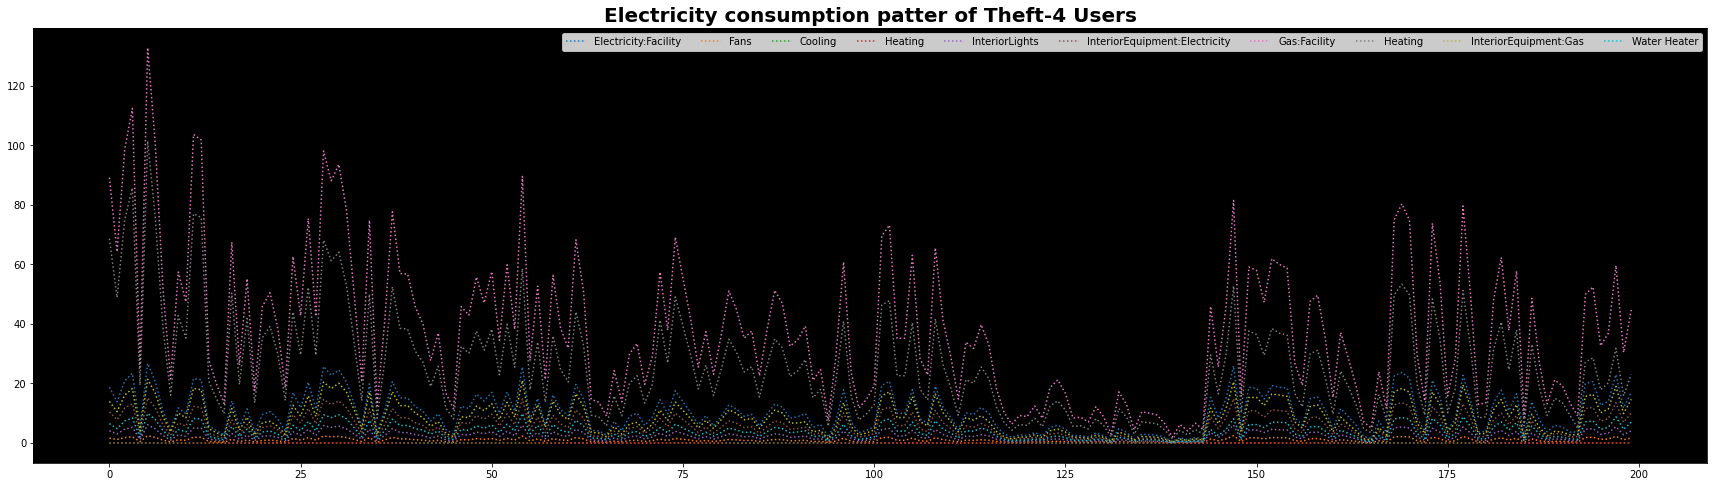

In [28]:
theft4=df[df['theft']==4]
theft4 = theft4.drop(["0","Class","theft"],axis=1)
theft4_arr=theft4.to_numpy()
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(8)
ax = plt.axes()
 

ax.set_facecolor("black")
plt.title("Electricity consumption patter of Theft-4 Users", fontweight='bold',fontsize=20)
plt.plot(theft4_arr[:200],linestyle = 'dotted')
plt.legend(column1, ncol = 10)
plt.show()


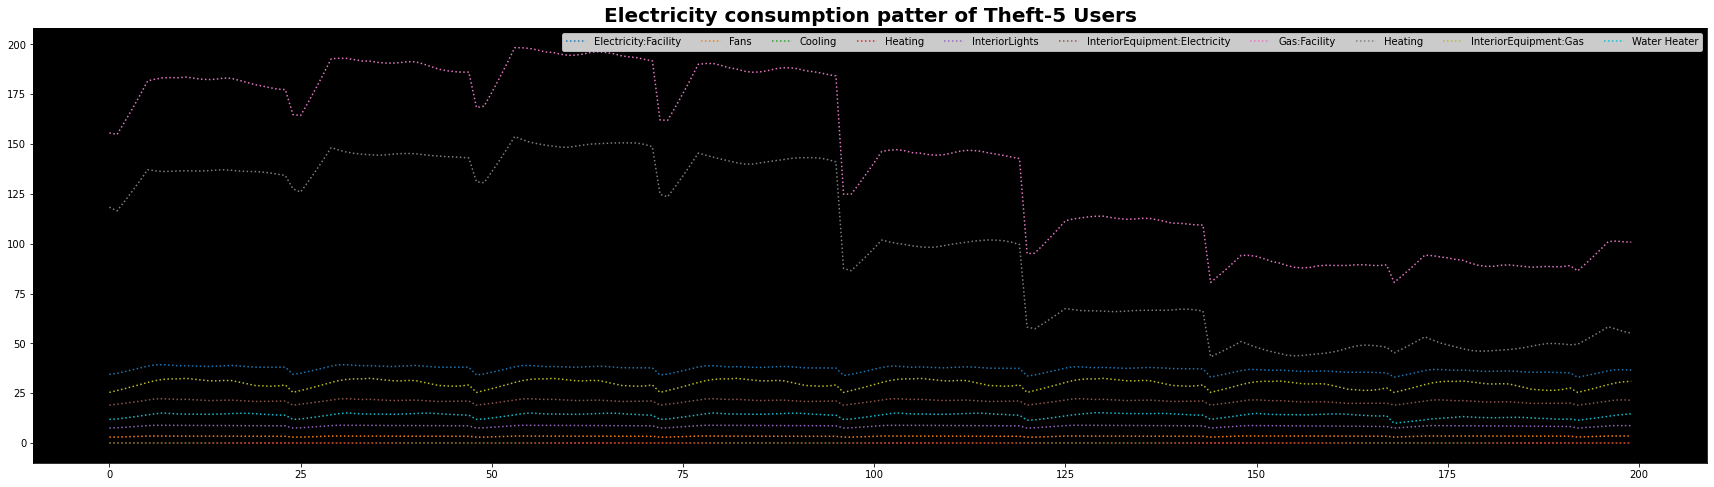

In [29]:
theft5=df[df['theft']==5]
theft5 = theft5.drop(["0","Class","theft"],axis=1)
theft5_arr=theft5.to_numpy()
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(8)
ax = plt.axes()
 

ax.set_facecolor("black")
plt.title("Electricity consumption patter of Theft-5 Users", fontweight='bold',fontsize=20)
plt.plot(theft5_arr[:200],linestyle = 'dotted')
plt.legend(column1, ncol = 10)
plt.show()


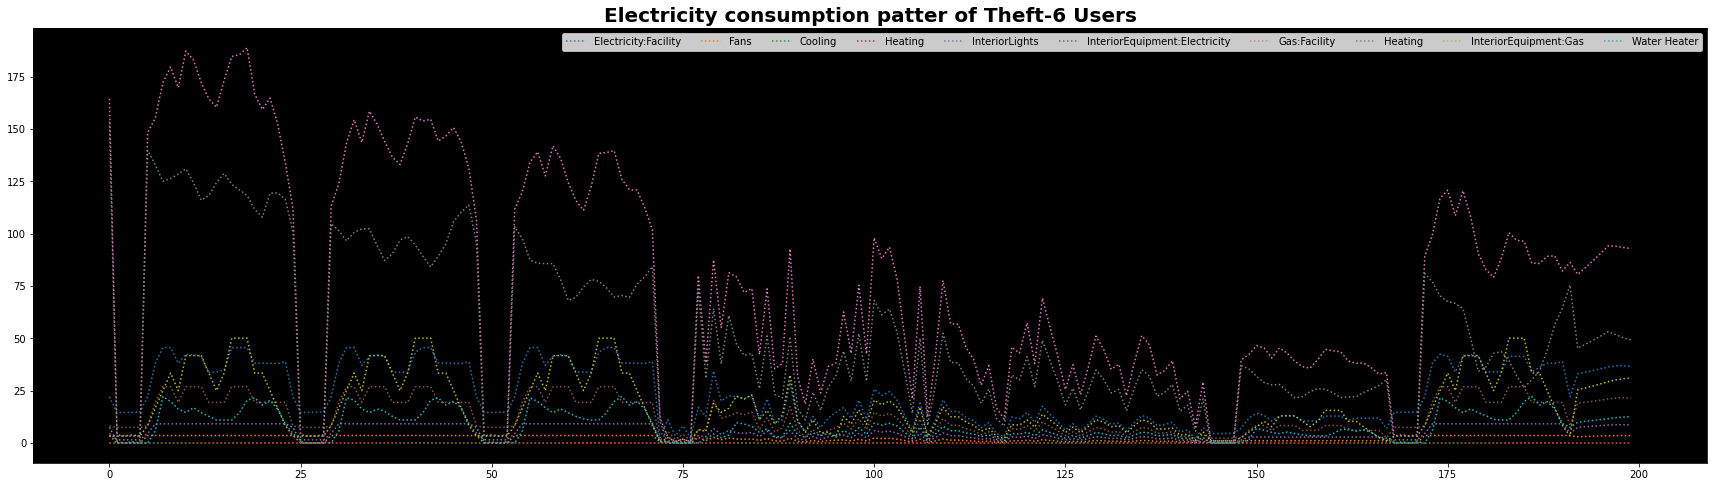

In [30]:
theft6=df[df['theft']==6]
theft6 = theft6.drop(["0","Class","theft"],axis=1)
theft6_arr=theft6.to_numpy()
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(8)
ax = plt.axes()
 

ax.set_facecolor("black")
plt.title("Electricity consumption patter of Theft-6 Users", fontweight='bold',fontsize=20)
plt.plot(theft6_arr[:200],linestyle = 'dotted')
plt.legend(column1, ncol = 10)
plt.show()


### Model Creation

In [31]:
X = df.drop(['0','Class','theft'],axis=1)
y= df.pop('theft')

In [32]:
X.head()

,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly)
0,22.035977,3.586221,0.0,0.0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947
1,14.649757,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000
2,14.669567,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000
3,14.677808,0.000000,0.0,0.0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052
4,14.824794,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000


In [33]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GRU, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
from keras.models import Sequential
import random
import numpy as np
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop,SGD,Adam

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42)


In [37]:
x_train.shape

(375638, 10)

In [38]:
y_train.shape

(375638,)

In [39]:
x_test.shape

(185017, 10)

In [40]:
y_test.shape

(185017,)

In [41]:
x_train.shape

(375638, 10)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [43]:
len(x_train.columns)

10

In [44]:
x_train.shape

(375638, 10)

In [45]:
x_train_array=np.asarray(x_train)
x_train_t = x_train_array.reshape(-1, x_train_array.shape[1], 1)
x_test_array=np.asarray(x_test)
x_test_t = x_test_array.reshape(-1, x_test_array.shape[1], 1)
y_train_array=np.asarray(y_train)
y_test_array=np.asarray(y_test)

In [46]:
import tensorflow as tf
from tensorflow import keras

In [47]:
train_labels = keras.utils.to_categorical(y_train_array)
test_labels = keras.utils.to_categorical(y_test_array)

In [48]:
n_timesteps, n_features = x_train.shape
print("n_timesteps",n_timesteps)

n_timesteps 375638


In [49]:
train_labels.shape

(375638, 7)

In [50]:
x_train_t.shape

(375638, 10, 1)

In [51]:
from keras.layers import Conv1D, MaxPooling1D, GRU, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu',input_shape=(x_train_t.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(GRU(32, return_sequences=True))
model.add(GRU(16))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(train_labels.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [52]:
train_labels.shape

(375638, 7)

In [53]:
y_train.shape

(375638,)

In [54]:
model.fit(x_train_t,train_labels, batch_size=32, epochs=10, validation_data=(x_test_t,test_labels))

Epoch 1/10
11739/11739 [==============================] - 119s 10ms/step - loss: 0.8994 - accuracy: 0.7018 - val_loss: 0.7587 - val_accuracy: 0.7394
Epoch 2/10
11739/11739 [==============================] - 102s 9ms/step - loss: 0.7175 - accuracy: 0.7524 - val_loss: 0.6675 - val_accuracy: 0.7681
Epoch 3/10
  336/11739 [..............................] - ETA: 1:28 - loss: 0.6739 - accuracy: 0.7691

KeyboardInterrupt: 

In [ ]:
model.evaluate(x_test_t,test_labels)

### Test Cases

In [ ]:
a=[[22.035977 ,3.586221 ,0.0 ,0.0 ,4.589925 ,8.1892 ,136.585903 ,123.999076 ,3.33988 ,9.246947]]
a=np.asarray(a)
a_t = a.reshape(-1, x_train_array.shape[1], 1)
model.predict(a_t)

In [ ]:
b=[[17.274210,1.858385 ,0.0 ,0.0 ,5.481225 ,1.0116 ,34.861068 ,34.861068 ,0.00000 ,0.000000]]
b=np.asarray(b)
b_t = b.reshape(-1, x_train_array.shape[1], 1)
model.predict(b_t)

In [55]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [56]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

                                        Specs         Score
0           Electricity:Facility [kW](Hourly)  1.301397e+07
6                   Gas:Facility [kW](Hourly)  6.093303e+06
7                    Heating:Gas [kW](Hourly)  4.280844e+06
2            Cooling:Electricity [kW](Hourly)  3.570328e+06
5  InteriorEquipment:Electricity [kW](Hourly)  3.430782e+06


In [57]:
featureScores

,Specs,Score
0,Electricity:Facility [kW](Hourly),1.301397e+07
1,Fans:Electricity [kW](Hourly),1.095915e+06
2,Cooling:Electricity [kW](Hourly),3.570328e+06
3,Heating:Electricity [kW](Hourly),7.973963e+04
4,InteriorLights:Electricity [kW](Hourly),2.646533e+06
5,InteriorEquipment:Electricity [kW](Hourly),3.430782e+06
6,Gas:Facility [kW](Hourly),6.093303e+06
7,Heating:Gas [kW](Hourly),4.280844e+06
8,InteriorEquipment:Gas [kW](Hourly),6.392113e+05
9,Water Heater:WaterSystems:Gas [kW](Hourly),1.186503e+06


In [58]:
featureScores.sort_values('Score',inplace=True)

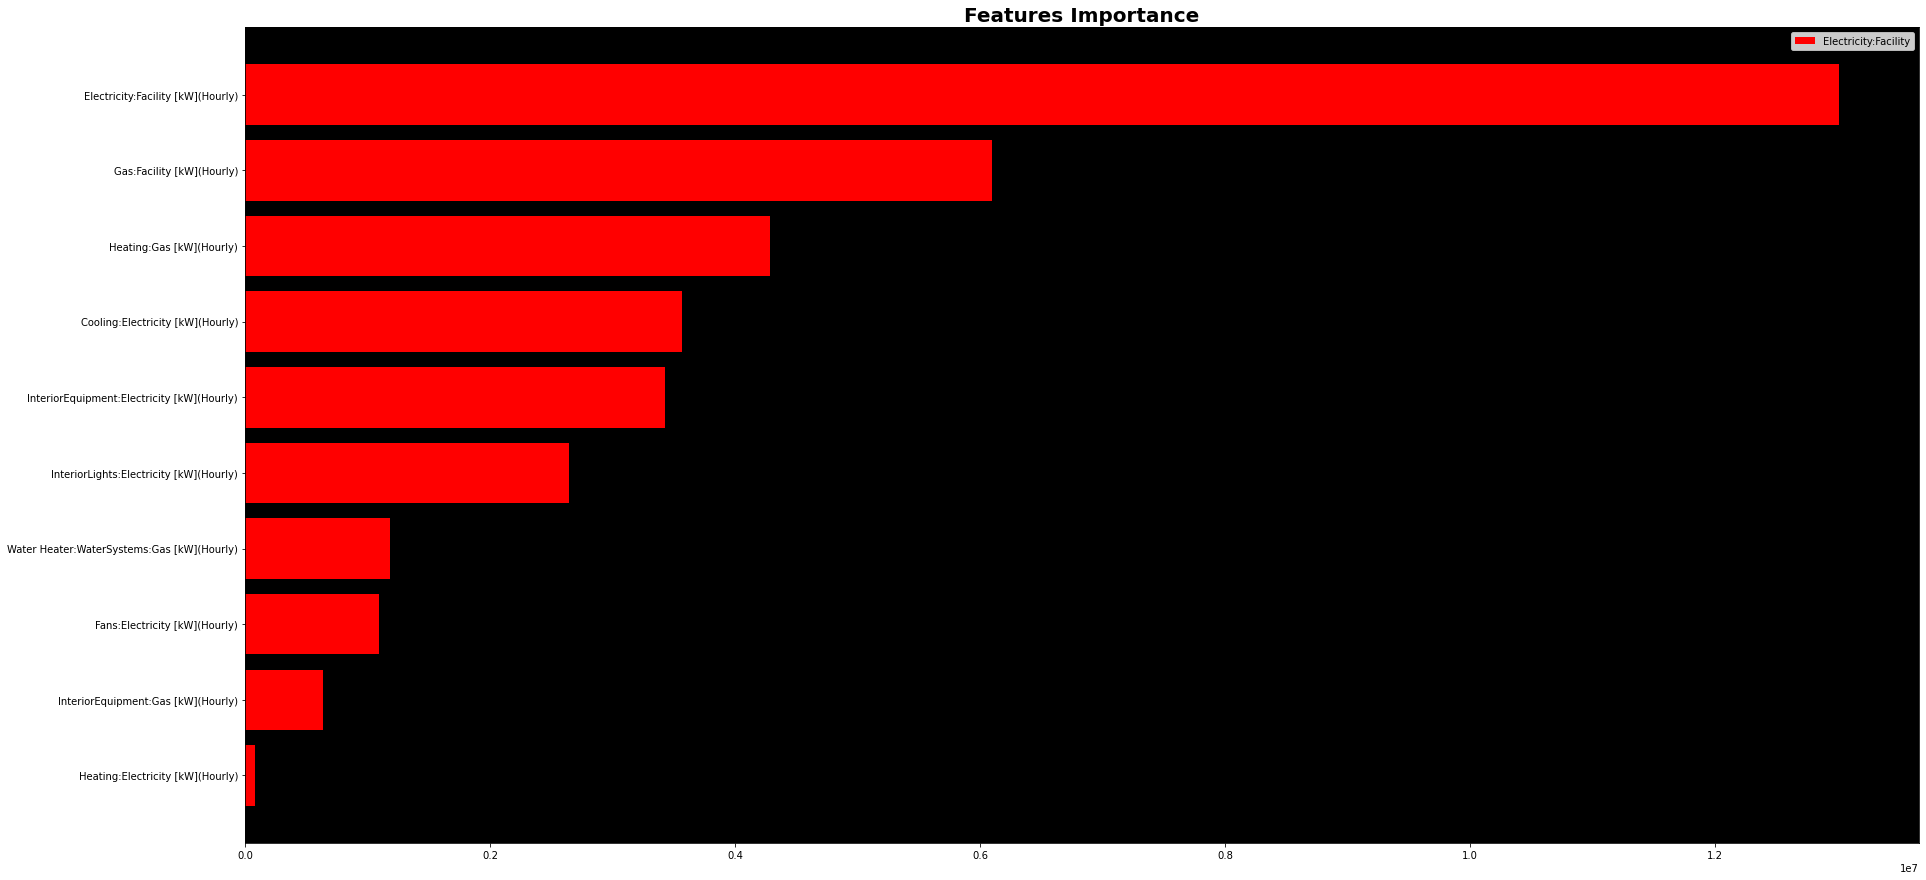

In [59]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(15)
ax = plt.axes()
 


ax.set_facecolor("black")
plt.title("Features Importance", fontweight='bold',fontsize=20)

plt.barh(featureScores["Specs"],featureScores["Score"],color='r')
plt.legend(column1, ncol = 10)
plt.show()




In [60]:
df1=pd.read_csv('df.csv')

In [61]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['theft'] = le.fit_transform(df1['theft']) 

In [62]:
imp_fea = pd.DataFrame(df1.drop(["Class","0","Fans:Electricity [kW](Hourly)","Heating:Electricity [kW](Hourly)","InteriorLights:Electricity [kW](Hourly)","Water Heater:WaterSystems:Gas [kW](Hourly)","InteriorEquipment:Gas [kW](Hourly)"],axis=1))

In [63]:
imp_fea

,Electricity:Facility [kW](Hourly),Cooling:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),theft
0,22.035977,0.0,8.1892,136.585903,123.999076,0
1,14.649757,0.0,7.4902,3.359880,0.000000,0
2,14.669567,0.0,7.4902,3.359880,0.000000,0
3,14.677808,0.0,7.4902,3.931932,0.000000,0
4,14.824794,0.0,7.4902,3.359880,0.000000,0
...,...,...,...,...,...,...
560650,17.388701,0.0,1.0116,36.755737,36.755737,6
560651,17.274210,0.0,1.0116,34.861068,34.861068,6
560652,18.231203,0.0,1.0116,52.866559,52.866559,6
560653,17.737117,0.0,1.0116,43.758956,43.758956,6


In [64]:
df1.head()

,0,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),Class,theft
0,0,22.035977,3.586221,0.0,0.0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,FullServiceRestaurant,0
1,1,14.649757,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,0
2,2,14.669567,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,0
3,3,14.677808,0.000000,0.0,0.0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,FullServiceRestaurant,0
4,4,14.824794,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,0


In [65]:
X=imp_fea.drop("theft",axis=1)
y=imp_fea.pop("theft")

In [66]:
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42)
x_train_array=np.asarray(x_train)
x_train_t = x_train_array.reshape(-1, x_train_array.shape[1], 1)
x_test_array=np.asarray(x_test)
x_test_t = x_test_array.reshape(-1, x_test_array.shape[1], 1)
y_train_array=np.asarray(y_train)
y_test_array=np.asarray(y_test)
train_labels = keras.utils.to_categorical(y_train_array)
test_labels = keras.utils.to_categorical(y_test_array)
n_timesteps, n_features = x_train.shape
print("n_timesteps",n_timesteps)



n_timesteps 375638


In [78]:
model = Sequential()

# Add the 1D CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train_t.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# Add the GRU layers
model.add(GRU(units=128, return_sequences=True))
model.add(GRU(units=128, return_sequences=True))
model.add(GRU(units=128))

# Add the output layer
model.add(Dense(train_labels.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_t,train_labels, batch_size=32, epochs=10, validation_data=(x_test_t,test_labels))


Epoch 1/10
3367/3367 [==============================] - 42s 10ms/step - loss: 1.3622 - accuracy: 0.4181 - val_loss: 1.2490 - val_accuracy: 0.4825
Epoch 2/10
3367/3367 [==============================] - 33s 10ms/step - loss: 1.1900 - accuracy: 0.5017 - val_loss: 1.1719 - val_accuracy: 0.5082
Epoch 3/10
3367/3367 [==============================] - 32s 9ms/step - loss: 1.0869 - accuracy: 0.5426 - val_loss: 1.0776 - val_accuracy: 0.5465
Epoch 4/10
3367/3367 [==============================] - 35s 10ms/step - loss: 1.0226 - accuracy: 0.5656 - val_loss: 1.0036 - val_accuracy: 0.5719
Epoch 5/10
3367/3367 [==============================] - 34s 10ms/step - loss: 0.9799 - accuracy: 0.5828 - val_loss: 0.9663 - val_accuracy: 0.5885
Epoch 6/10
3367/3367 [==============================] - 34s 10ms/step - loss: 0.9489 - accuracy: 0.5920 - val_loss: 0.9419 - val_accuracy: 0.5932
Epoch 7/10
3367/3367 [==============================] - 34s 10ms/step - loss: 0.9251 - accuracy: 0.6010 - val_loss: 0.9150 - 

In [67]:
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu',input_shape=(x_train_t.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(GRU(32, return_sequences=True))
model.add(GRU(16))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(train_labels.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train_t,train_labels, batch_size=32, epochs=10, validation_data=(x_test_t,test_labels))

Epoch 1/10
  674/11739 [>.............................] - ETA: 1:05 - loss: 1.2118 - accuracy: 0.6297

KeyboardInterrupt: 

In [79]:
model.evaluate(x_test_t,test_labels)

1659/1659 [==============================] - 6s 4ms/step - loss: 0.9053 - accuracy: 0.6062


[0.9052943587303162, 0.6062222123146057]

In [80]:
a=[[14.824794 ,0.0 ,7.4902 ,3.359880 ,0.000000]]
a=np.asarray(a)
a_t = a.reshape(-1, x_train_array.shape[1], 1)
model.predict(a_t)

1/1 [==============================] - 2s 2s/step


array([[6.5302521e-01, 1.9702947e-02, 2.7051534e-09, 1.7834388e-02,
        1.0031776e-05, 1.3191879e-05, 3.0941421e-01]], dtype=float32)

In [81]:
b=[[17.388701 ,0.0 ,1.0116 ,36.755737,36.755737]]
b=np.asarray(b)
b_t = b.reshape(-1, x_train_array.shape[1], 1)
model.predict(b_t)

1/1 [==============================] - 0s 27ms/step


array([[6.2787169e-01, 2.9617108e-03, 3.6162536e-08, 2.6437964e-03,
        5.1838401e-06, 2.0441827e-03, 3.6447346e-01]], dtype=float32)

### Sampling

In [68]:
df_0 = df1[df1['theft']==0]
df_1 = df1[df1['theft']==1]
df_2 = df1[df1['theft']==2]
df_3 = df1[df1['theft']==3]
df_4 = df1[df1['theft']==4]
df_5 = df1[df1['theft']==5]
df_6 = df1[df1['theft']==6]

In [69]:
print(df_0.shape)
print(df_1.shape)
print(df_2.shape)
print(df_3.shape)
print(df_4.shape)
print(df_5.shape)
print(df_6.shape)

(331824, 13)
(51083, 13)
(22973, 13)
(44349, 13)
(41460, 13)
(33553, 13)
(35413, 13)


In [67]:
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu',input_shape=(x_train_t.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(GRU(32, return_sequences=True))
model.add(GRU(16))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(train_labels.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train_t,train_labels, batch_size=32, epochs=10, validation_data=(x_test_t,test_labels))

Epoch 1/10
  674/11739 [>.............................] - ETA: 1:05 - loss: 1.2118 - accuracy: 0.6297

KeyboardInterrupt: 

In [70]:
df_0_sampled = df_0.sample(22973)
df_1_sampled = df_1.sample(22973)
df_2_sampled = df_2.sample(22973)
df_3_sampled = df_3.sample(22973)
df_4_sampled = df_4.sample(22973)
df_5_sampled = df_5.sample(22973)
df_6_sampled = df_6.sample(22973)



In [71]:
df_balanced = pd.concat([df_0_sampled,df_1_sampled,df_2_sampled,df_3_sampled,df_4_sampled,df_5_sampled,df_6_sampled])
df_balanced.shape

(160811, 13)

In [72]:
imp_fea = pd.DataFrame(df_balanced.drop(["Class","0","Fans:Electricity [kW](Hourly)","Heating:Electricity [kW](Hourly)","InteriorLights:Electricity [kW](Hourly)","Water Heater:WaterSystems:Gas [kW](Hourly)","InteriorEquipment:Gas [kW](Hourly)"],axis=1))

In [73]:
imp_fea

,Electricity:Facility [kW](Hourly),Cooling:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),theft
155065,978.908810,576.983689,113.312781,366.347636,352.007195,0
2622,41.393151,0.011597,26.914700,124.392081,77.136113,0
33968,1100.719827,0.000000,448.566544,1392.012524,1369.915492,0
96489,14.055713,0.000000,4.950048,17.996456,17.543324,0
200328,86.039891,30.516674,15.988889,90.755978,87.764248,0
...,...,...,...,...,...,...
160433,52.196315,18.257108,10.864738,37.140720,0.361082,6
525653,46.775663,0.392498,8.576322,0.000000,0.000000,6
558474,15.415824,0.000000,1.011600,0.000000,0.000000,6
496813,28.642437,3.965474,13.077000,4.739439,0.000000,6


In [74]:
X=imp_fea.drop("theft",axis=1)
y=imp_fea.pop("theft")


In [75]:
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42)
x_train_array=np.asarray(x_train)
x_train_t = x_train_array.reshape(-1, x_train_array.shape[1], 1)
x_test_array=np.asarray(x_test)
x_test_t = x_test_array.reshape(-1, x_test_array.shape[1], 1)
y_train_array=np.asarray(y_train)
y_test_array=np.asarray(y_test)
train_labels = keras.utils.to_categorical(y_train_array)
test_labels = keras.utils.to_categorical(y_test_array)
n_timesteps, n_features = x_train.shape
print("n_timesteps",n_timesteps)

n_timesteps 107743


In [ ]:
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu',input_shape=(x_train_t.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(GRU(32, return_sequences=True))
model.add(GRU(16))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(train_labels.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train_t,train_labels, batch_size=32, epochs=20, validation_data=(x_test_t,test_labels))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=50)
model.fit(x_train_t,train_labels, batch_size=32, epochs=50, validation_data=(x_test_t,test_labels),callbacks=es)

In [ ]:
a=[[14.824794 ,0.0 ,7.4902 ,3.359880 ,0.000000]]
a=np.asarray(a)
a_t = a.reshape(-1, x_train_array.shape[1], 1)
model.predict(a_t)

In [ ]:
b=[[17.388701 ,0.0 ,1.0116 ,36.755737,36.755737]]
b=np.asarray(b)
b_t = b.reshape(-1, x_train_array.shape[1], 1)
model.predict(b_t)

### For all features

In [ ]:
X=df_balanced.drop(["theft","Class","0"],axis=1)
y=df_balanced.pop("theft")


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42)
x_train_array=np.asarray(x_train)
x_train_t = x_train_array.reshape(-1, x_train_array.shape[1], 1)
x_test_array=np.asarray(x_test)
x_test_t = x_test_array.reshape(-1, x_test_array.shape[1], 1)
y_train_array=np.asarray(y_train)
y_test_array=np.asarray(y_test)
train_labels = keras.utils.to_categorical(y_train_array)
test_labels = keras.utils.to_categorical(y_test_array)
n_timesteps, n_features = x_train.shape
print("n_timesteps",n_timesteps)

In [ ]:
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu',input_shape=(x_train_t.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(GRU(32, return_sequences=True))
model.add(GRU(16))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(train_labels.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=2)
model.fit(x_train_t,train_labels, batch_size=32, epochs=20, validation_data=(x_test_t,test_labels),callbacks=es)


In [ ]:
a=[[22.035977 ,3.586221 ,0.0 ,0.0 ,4.589925 ,8.1892 ,136.585903 ,123.999076 ,3.33988 ,9.246947]]
a=np.asarray(a)
a_t = a.reshape(-1, x_train_array.shape[1], 1)
model.predict(a_t)

In [ ]:
b=[[17.274210,1.858385 ,0.0 ,0.0 ,5.481225 ,1.0116 ,34.861068 ,34.861068 ,0.00000 ,0.000000]]
b=np.asarray(b)
b_t = b.reshape(-1, x_train_array.shape[1], 1)
model.predict(b_t)

In [ ]:
c=[[18.413804 ,2.997979 ,0.0 ,0.0 ,5.481225 ,1.0116 ,56.456040 ,56.456040 ,0.00000 ,0.000000 ]]
c=np.asarray(c)
c_t = c.reshape(-1, x_train_array.shape[1], 1)
model.predict(c_t)

In [ ]:
2.8685628e-22>3.6724585e-01

In [ ]:
df["Class"].value_counts()

In [ ]:
df_FullServiceRestaurant=df[df["Class"]=="df_FullServiceRestaurant"]
df_SecondarySchool=df[df["Class"]=="SecondarySchool"]
df_Warehouse=df[df["Class"]=="Warehouse"]
df_SuperMarket=df[df["Class"]=="SuperMarket"]
df_StripMall=df[df["Class"]=="StripMall"]
df_StandaloneRetail=df[df["Class"]=="Stand-aloneRetail"]
df_SmallOffice=df[df["Class"]=="SmallOffice"]
df_SmallHotel=df[df["Class"]=="SmallHotel"]
df_QuickServiceRestaurant=df[df["Class"]=="QuickServiceRestaurant"]
df_Hospital=df[df["Class"]=="Hospital"]
df_PrimarySchool=df[df["Class"]=="PrimarySchool"]
df_OutPatient=df[df["Class"]=="OutPatient"]
df_MidriseApartment=df[df["Class"]=="MidriseApartment"]
df_MediumOffice=df[df["Class"]=="MediumOffice"]
df_LargeOffice=df[df["Class"]=="LargeOffice"]
df_LargeHotel=df[df["Class"]=="LargeHotel"]

In [ ]:
pred=model.predict(c_t)
pred

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
y_predict

In [1]:
softmax_output=np.array([0.1,0.3,0.6])
max_index=np.argmax(softmax_output)
binary_output=np.zeros_like(softmax_output)
binary_output[max_index]=1
binary_output

NameError: name 'np' is not defined

In [ ]:
for i in y_predict:
    max_index=np.argmax(i)
    binary_output=np.zeros_like(i)
    binary_output[max_index]=1
binary_output


In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix

In [ ]:
test_labels

In [ ]:
confusion_matrix(test_labels,y_predict)

In [ ]:

model = Sequential()

# Add the 1D CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(timesteps, input_dim)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# Add the GRU layers
model.add(GRU(units=128, return_sequences=True))
model.add(GRU(units=128, return_sequences=True))
model.add(GRU(units=128))

# Add the output layer
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_val, y_val))
